# Python Visualizations

In [1]:
# import numpy
import numpy as np
from numpy.random import random

# import pandas
import pandas as pd

# import pyplot
import matplotlib.pyplot as plt

# import interactions
from IPython import display
from ipywidgets import interact, widgets

# run matplotlib inline for displaying using Jupyter notebook
%matplotlib inline

# import seaborn
import seaborn as sns

# import bokeh packages
from bokeh.io import output_file, show, output_notebook, push_notebook
# from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Slider, Select, Button
# from bokeh.models import HoverTool
# from bokeh.models import CategoricalColorMapper
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import row, column, gridplot
# from bokeh.layouts import column
from bokeh.io import curdoc
from bokeh.io.notebook import show_app

## Basics
- Basic Principles
    - Graphical Inegrity
        - ex. not altering axes to accentuate small changes
        - if not zero based y axis, draw attention, add error bars/confidence intervals etc.
    - Keep It Simple
        - Tufte: maximize data ink/total ink ratio (less words, more data)
        - don't sacrifice communication/effectiveness to 'make it look pretty' (3D generally bad)
        - avoid chartjunk (background, gridlines, etc.)
        - don't use intensity/area/color scales to judge quantitative values
            - difficult to interpret
            - color/shading better for qualitative differences
    - Use the Right Display
        - graph/chart type etc.
        - don't forget different types within a category (i.e. change bar chart)
    - Use Color Strategically
    - Tell a Story
        - sometimes a single number is best
        - ensure you tell the story
- Efficiency of People at Judging **Quantitative** Differences
    - **Position, length, slope/angle**, area, intensity, color/shape
- Data Type and Usage
    - Quantitative: position, length, slope
    - Ordered: area, intensity (relative judgement)
        - if using color for intensity, stay away from full rainbow (colorblindness one factor)
    - Categories: color, shape
        - use 'crayon' basic colors, not rainbow colors (perceptually nonlinear)
- Color Brewer
    - [http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3](colorbrewer)
    - built-in to seaborn
- What not to do
    - Visit [https://viz.wtf/](WTFVisualizations) for interesting visualization fails

# matplotlib
#### Display a Plot
- Display plots inline in Jupyter Notebook    
    - `%matplotlib inline` 
- Display a figure
    - `plt.show()`
- Save a figure as an image
    - `plt.savefig('filename.png')`

#### Variables Can Store Array Data
- calls to `plt.` (even for titles) often return arrays that can be stored in variables
    - common practice to assign this to an underscore instead `_ = plt.hist()`

#### Assigning Data
- `plt.plot(x-var, y-var[, options])`
    - Options
        - `color=''`
- Can assign more than one plot to the same graph, just specify the same `x-var` in multiple `plt.plot` commands
    - specify a different color for each plot
    
- Storing Data from Plots in Variables
    - `counts, bins, patches = plt.hist(data, bins=)`
    - this will store data generated from the plot invariables that can be accessed later

#### Labels and Axis Control
- Labels and Graph Items
    - `plt.xlabel(string)`
    - `plt.ylabel(string)`
    - `plt.title(string)`
- Axis Ranges (use either tuples or lists to supply)
    - `plt.axis([xmin, xmax, ymin, ymax])`
        - sets all at once
    - `plt.xlim([xmin, xmax])` sets only the x axis 
        - will use default vertical scale that fits all the data
    - `plt.ylim([ymin, ymax])` sets only the y axis
        - will use default horizontal scale that fits all the data
    - other `axis` options
        - `'off'` hides the axis lines/labels
        - `'equal'` sets the scale equal for x, y
            - equal axis doesn't mean square plot, especially evident with multiple plots
        - `'square'` forces a square plot
        - `'tight'` sets xlim(), ylim() to show all data
    - `xticks` which is different than above and useful for datetimes
        - `plt.xticks(data, labels, rotation=)`
            - specify the data to use for the x axis first as a variable
            - the labels to display second as a variable
                - only difference between data/labels should be formatting
                - there should be the same number of entries
            - set the rotation as desired to an angle in degress
    - `plt.yticks([])` provides a list of ytick marks to use
- Rotate x axis labels
    - `plt.gcf().autofmt_xdate()`
        - this auto rotates
    - `plt.xticks(rotation=60)`
        - set it manually, 60 deg is a good choice

#### Plotting Pandas Objects
- Pandas Series
    - Select the series
        - `pd_series = df['col_name']`
    - Plot the series using built-in plot method
        - `pd_series.plot(options)`
        - or `df['col_name'].plot(options)`
    - Show the plot
        - `plt.show()`
- Pandas Dataframes
    - Plot the series
        - `df.plot(options)`
        - will plot every column on the same graph with the same axis
        - if the ranges are majorly different, won't see all of the plots
        - set `plt.yscale('log')` to change the scale to allow viewing of all plots
    - Options
        - `x='column_name'`
            - select the x column to use
        - `y='column_name'`
            - select the y column to use
        - `kind='type'`
            - types of plots
                - 'scatter', 'line', 'bar', 'barh', 'pie',
                - 'box', 'hist', 'kde', 'density', 'area', 'hexbin'
            - barh will rotate a barplot, possibly making category labels easier to read
            - you have access to all special plot options, like for 'hist'
                - see sections on those plots for more info
        - `stacked=True`
            - will create a stacked barplot
        - `style=`     ex. `style='k.-'`
            - matlab like style string can be passed to format the curve made of three chars
                - colors: 'k': black, 'b': blue, 'r': red, 'c': cyan, 'g': green
                - marker: 'o': circle, '\*': star, 's': square, '+': plus 
                - line type: '-': solid, play around 
            - can also name a style set to use i.e. 'ggplot'
        - `subplots=True`
            - do subplots for each column (y) based on the index (x)
                - don't specify `y=` or maybe provide a list?
            - default arrangement for line graphs is one column of plots stacked on top of each other
                - it appears to be two columns (horizontally listed) for 'box' plots
   - Print the **Pearson correlation coefficient**
       - `print(df.corr())`
           - instead of `df` might use one of the following:
               - `df['col']`
               - `weekly_mean = df.loc[:,['col1', 'col2']].resample('W').mean()`
                   - `print(weekly_mean.corr())`
   - Show the plot
        - `plt.show()`
- Use any of the `plt.plot` options and secondary `plt.` methods to format these plots
    - specify any `.plot` options you want during the original plot call

#### Selecting and Formatting Dates for Axes (x data)
- Set the index of a pandas df to datetimes
    - reindexing based on datetimes and sorting data
    - see pandas jupyter for more information
    - **pyplot does well working with pandas series**
        - just plotting the selected series, should auto-select datetime indexes for the x axis
- Store the data of interest in a var using datetime slicing
    - `data = df['datetime_string'[:'datetime_end']]`
- Store the index values
    - `dates = df.index[]`
        - use slicing to get the proper labels
        - useful to use `df.index[::num]` to skip dates and only select certain invervals for labels
- Format the labels using `strftime`
    - `labels = dates.strftime('format_string')`

#### Default Style Sheets
- Provides defaults for lines, points, backgrounds, etc.
- `plt.style.availabe`
    - provides a list of styles available to use
- `plt.style.use('style')` to set the style to use
    - `'ggplot'`
    - `'fivethirtyeight'`

     state/region     ages  year  population
year                                        
2012           AL  under18  2012   1117489.0
2012           AL    total  2012   4817528.0
2010           AL  under18  2010   1130966.0
2010           AL    total  2010   4785570.0
2011           AL  under18  2011   1125763.0

     state/region   ages  year  population
year                                      
1990           SC  total  1990   3501155.0
1991           SC  total  1991   3570404.0
1992           SC  total  1992   3620464.0
1993           SC  total  1993   3663314.0
1994           SC  total  1994   3705397.0



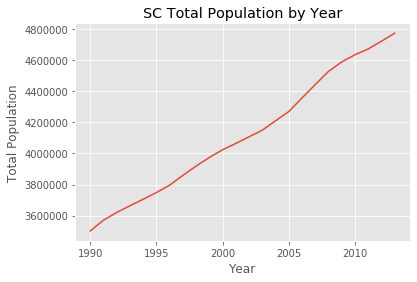

In [2]:
# import state population data
df = pd.read_csv('DSHB_Data\state-population.csv')
df.index = df['year']

print(df.head())
print()

# filter data to SC total population
sc_filter = np.logical_and(df['state/region'] == 'SC', df.ages == 'total')

# subset the data to SC total population and sort by the index
sc_pop_data = df[sc_filter]
sc_sorted_pop_data = sc_pop_data.sort_index()

print(sc_sorted_pop_data.head())
print()

# get the years from the index
years = list(sc_sorted_pop_data.index)

# get the total population
tot_pop = list(sc_sorted_pop_data.loc[:, 'population'])

# create the plot

# set plot style to 'ggplot'
plt.style.use('ggplot')

plt.plot(years, tot_pop)

# configure the plot labels
plt.title('SC Total Population by Year')
plt.xlabel('Year')
plt.ylabel('Total Population')

plt.show()

#### Multiple Plots Using 'Axes'
- Assigning axes values
    - Useful for control over axes
    - Useful when showing multiple sets on one plot that have different value ranges
        - can produce two plots side by side if you specify these numbers correctly
            - could also overlay
            - depends on where your bottom left corner is, and the width you set
        - can produce two plots on top of each other
            - adjust your bottom left corner and the height you set
    - `plt.axes([x_lo, y_lo, width, height])`
        - list args all expressed in 'figure units'(numbers 0-1 scaled to the dimensions of the figure)
            - `x_lo` 
            - `y_lo`
                - these two values set the lower left corner locations of the plot
            - `width`
            - `height`
                - these two values set the size of the plot
        - every `plt.` command that follows will use the specified `axes` until it is changed
        - the first `axes` command will appear on the left of the plot, the second on the right
- **Inset Plots**
    - set the `plt.axes` for one plot, and don't set it for another plot
    - you decide the location of the inset plot using `x_lo` and `y_lo`
    - you decide the size of the plot with `width` and `height`
    - `plt.axes([0.25, 0.5, 0.35, 0.35])` might be a good starting point

#### Multiple Plots Using 'Subplot' (better than axes)
- Use to display multiple plots
    - the 'rows' and 'cols' below are how the different plots are arranged
    - 'rows' and 'cols' numbers are 1-indexed starting at the top left corner
- `plt.subplot(nrows, ncols, nsubplot)`
    - `nrows` = number of rows
    - `ncols` = number of columns
    - `nsubplot` = the number of the subplot to activate for subsequent commands
        - numbering is left to right, then down a row, left to right like numbering words on a page
        - each command that follows applies to the active subplot, until another subplot is activated
    - `plt.subplot(1, 2, x)` is side by side
    - `plt.subplot(2, 1, x)` is top and bottom
- `plt.tight_layout()`
    - Makes sure that axis labels/titles don't overlap

     state/region   ages  year  population
year                                      
1990           SC  total  1990   3501155.0
1991           SC  total  1991   3570404.0
1992           SC  total  1992   3620464.0
1993           SC  total  1993   3663314.0
1994           SC  total  1994   3705397.0

     state/region   ages  year  population
year                                      
1990           FL  total  1990  13033307.0
1991           FL  total  1991  13369798.0
1992           FL  total  1992  13650553.0
1993           FL  total  1993  13927185.0
1994           FL  total  1994  14239444.0



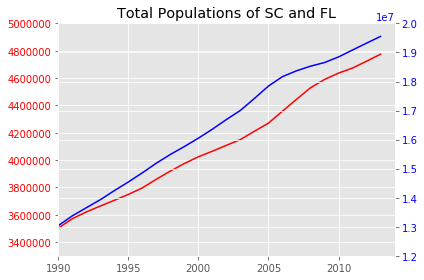

In [3]:
# use the state population dataframe from before

# compare SC data to FL data
# filter data to FL total population
fl_filter = np.logical_and(df['state/region'] == 'FL', df['ages'] == 'total')

# subset the data to SC total population and reset index
fl_pop_data = df[fl_filter]
fl_sorted_pop_data = fl_pop_data.sort_index()

print(sc_sorted_pop_data.head())
print()

print(fl_sorted_pop_data.head())
print()

# years and tot_pop still populated for SC

# get the years for FL
fl_years = list(fl_sorted_pop_data.index)

# get the total population for FL
fl_tot_pop = list(fl_sorted_pop_data.loc[:, 'population'])

# set the plot style
plt.style.use('ggplot')

# parse the subplot to first configure sc plot
fig, sc_ax = plt.subplots()

# configure the SC plot
sc_ax.set_xlabel = ('Years')
sc_ax.set_ylabel = ('SC Total Population')
sc_ax.plot(years, tot_pop, color='red')
sc_ax.tick_params(axis='y', labelcolor='red')
sc_ax.set(xlim=(1990, 2014))
sc_ax.set(ylim=(3300000, 5000000))
sc_ax.axis('on')

# configure the FL plot
fl_ax = sc_ax.twinx() # create a second axis that shares the same x-axis

fl_ax.set_ylabel = ('FL Total Population')
fl_ax.plot(years, fl_tot_pop, color='blue')
fl_ax.tick_params(axis='y', labelcolor='blue')
fl_ax.set(xlim=(1990, 2014))
fl_ax.set(ylim=(12000000, 20000000))

plt.title('Total Populations of SC and FL')

fig.tight_layout()

plt.show()

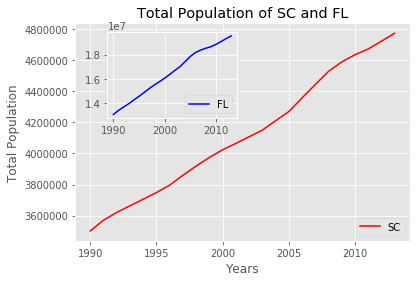

In [4]:
# create an inset plot of the same data above

# plot sc data in the full view
plt.plot(years, tot_pop, color='red', label='SC')
plt.title('Total Population of SC and FL')
plt.xlabel('Years')
plt.ylabel('Total Population')

plt.legend(loc='lower right')

# set axes for FL plot
plt.axes([0.2, 0.55, 0.3, 0.3])
plt.plot(years, fl_tot_pop, color='blue', label='FL')

plt.legend(loc='lower right')

plt.show()

#### Scatter Plots
- `plt.scatter(x_data, y_data, marker='', color='', label='', s=)`
    - `marker` is used to set the shape of the marker
    - `color` is pretty obvious
    - `label` is important if creating a legend
    - `s=` provides a size for the points on a scatter plot
- can also create a scatter plot using:
    - `plt.plot(x_data, y_data, marker='.', linestyle='none')`

#### Legend and Annotate for Labeling Plots
- `plt.legend(loc='')`
    - must supply a `label` for each plot (see scatter example above)
    - supply a `loc` description as a string listed below or its integer counterpart
        - 'upper left' = 2
        - 'center left' = 6
        - 'best' = 0
        - 'upper center' = 9
        - 'center' = 10
        - 'lower center' = 8
        - 'upper right' = 1
        - 'center right' = 7
        - 'lower right' = 4
        - 'right' = 5
- `plt.annotate('label', xy=(xcoord, ycoord)[, xytext(xcoord, ycoord), arrowprops])`
    - will place your supplied 'label' at the xy coordinates specified by your supplied tuple
    - can draw an arrow if you supply `xytext` and `arrowprops`
        - `arrowprops` is a dictionary with the arrow's properties
            - `{'color':''}` at mininum to draw the arrow
            - `xy` will be where the arrow points
            - `xytext` is where the text is and where the arrow comes from

## 2D Arrays/Figures with Meshgrid
#### Numpy's Meshgrid
- Creating a quick meshgrid
    - `Y, X = np.meshgrid(range(10), range(20)`
        - will create two arrays of shape (20, 10) with steps of 1
- Creating a custom meshgrid
    - `u = np.linspace(start, stop, num)`
        - `stop` is included unless `endpoint=False`
    - `v = np.linspace(start, stop, num)`
    - `X, Y = meshgrid(u, v)`
        - creates your custom arrays of shape 'step' from u, 'step' from v
        - values are 'num' from u, and 'num' from v

#### plt.pcolor
- Creates a plot with colors used to represent different values
    - creates a pixelated plot, with pixels of different colors
    - good for storing/plotting images
    - the number of pixels is determined by your meshgrid
- `plt.pcolor([X, Y,] Z [cmap=''])`
    - Z is the data to plot
    - X and Y can specify axis values
        - default is the size of the mesh grid
    - `cmap` defines the color scheme

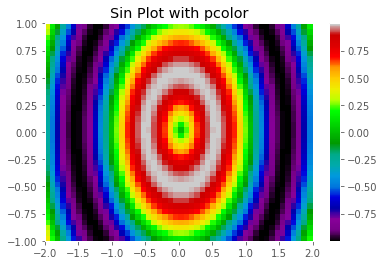

In [5]:
# create a sin plot using meshgrid and pcolor

# create two 1-d arrays
# increasing the number of points changes the resolution of the plot
u = np.linspace(-2, 2, 51)
v = np.linspace(-1, 1, 41)

# create a meshgrid based on the 1-d arrays
X, Y = np.meshgrid(u, v)

# compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2))

# create the color plot using pcolor
plt.pcolor(X, Y, Z, cmap='nipy_spectral')  # set the cmap='' to change the color scheme
    # just doing plt.pcolor(Z) will use the dimensions of the mesh (51, 41) as the axis scales
    # occurs when omitting X, Y from the plt.pcolor() call above
plt.colorbar()  # displays a color bar as a key for the values of each pixel
plt.axis('tight') # fixes issues with whitespace around figures
plt.title('Sin Plot with pcolor')
plt.show()

#### plt.contour
- Similar to pcolor, but will show contour lines for constant values
    - good for maps or other continuous data types
- `plt.contour([X, Y,] Z[, num])`
    - where `Z` is the equation based on a meshgrid
    - X and Y are optional to provide your data range vs. size of the meshgrid
    - `num` is the number of contour lines to draw
- `plt.contourf()`
    - 'filled' contour plot, transitions are not continuous
        - increase the `num` of lines to makes transitions appear continuous
        - decrease the `num` of lines to show stark jumps
    - accepts the same args as plt.contour

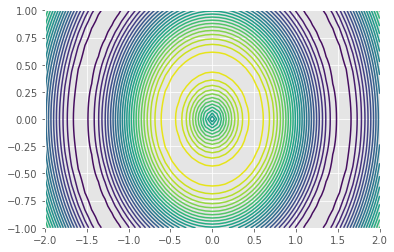

In [6]:
# same data as before, this time calling plt.contour

plt.contour(X, Y, Z, 30)
plt.show()

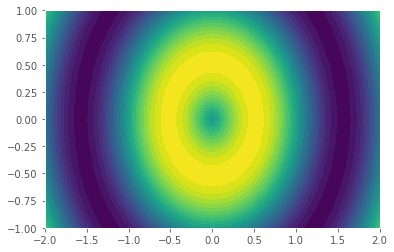

In [7]:
# same data as before, this time calling plt.contourf

plt.contourf(X, Y, Z, 30)
plt.show()

## Histograms
#### 1-D Histograms
- `plt.hist(data, bins=num[, range=()][, normed=][, cumulative=][, alpha=])`
    - options
        - `bins=`
            - number of bins to use
            - 'square root rule' best practice
                - set `bins=` to the `np.sqrt()` of the number of samples
        - `range=()` arg accepts a nest of tuples to set x and y axis ranges
            - `range=((xmin, xmax), (ymin, ymax))`
        - `normed=`
            - when True, will rescale so the sum of all counts to add to 1
            - this creates a PDF or probability distribution function
        - `cumulative=`
            - always set `normed=True` when using `cumulative=True`
            - when True, the cumulative counts are recorded, not individual bin counts
            - CDF or cumulative distribution function
        - `alpha=`
            - supply a float between 0-1 to set the transparency of bars

#### 2-D Histograms
- `plt.hist2d(x, y, bins(xnum,ynum))`
    - 'x' and 'y' are 1-d arrays of the same length
    - bins are specified as a tuple of integers 
        - 'xnum' and 'ynum' specify the axes
    - the bins are rectangular in shape
- `plt.hexbin(x, y, gridsize=(xnum,ynum)[, extent=()])`
    - works similarly to hist2d, but uses hexagonal bins
    - `gridsize` is the number of hexagonal bins to draw in the x, y directions
    - `extent=()` works like `range` above, but only supply 1 tuple
        - `extent=(xmin, xmax, ymin, ymax)`

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
3      4      James Madison         163
4      5       James Monroe         183



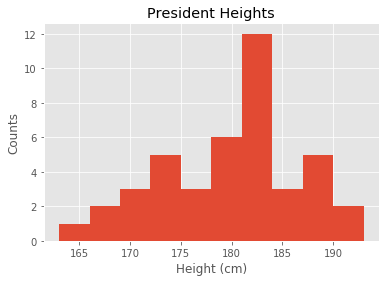

In [8]:
# import president height data
df = pd.read_csv('DSHB_Data\president_heights.csv')
print(df.head())
print()

plt.hist(df['height(cm)'], bins=10)
plt.title('President Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Counts')
plt.show()

## Cumulative Distribution Function (CDF)
- aka Empirical Cumulative Distribution Function (ECDF)
- Steps
    - `import numpy as np`
    - sort x data
        - `x = np.sort(x_data)` where x_data can be a list of values, numpy array, or pandas series
    - scale y data based on distribution
        - `y = np.arange(1, len(x)+1) / len(x)`
    - create plot
        - `_ = plt.plot(x, y, marker='.', linestyle='none')`
    - label axes
    - ensure points don't overflow the edges
        - `plt.margins(0.02)`
    - show the plot
        - `plt.show()`
        
```python
def ecdf(data):
"""Return x, y data for an ECDF receiving a 1d array, list, or series."""
         
    # compute the number of points
    n = len(data)
            
    # sort the x data and store
    x = np.sort(data)
            
    # compute y using the distribution
    y = np.arange(1, n+1) / n
            
    # return x and y
    return x, y
```        

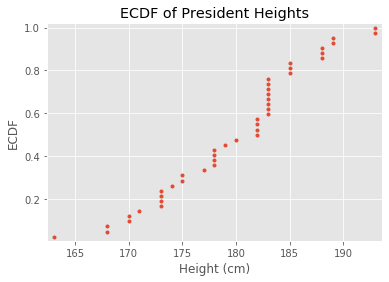

In [9]:
# using president height data
# this is not the best example, but shows the process at least
df = pd.read_csv('DSHB_Data\president_heights.csv')

x = np.sort(df['height(cm)'])
y = np.arange(1, len(x)+1) / len(x)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Height (cm)')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of President Heights')

plt.margins(0.02)
plt.show()

## Color Images
- Usually 3 2d arrays
    - 1 2d array (or channel) for each color in RGB
    - channel values are 0-1 as floats or 0-255 as ints
- Loading images
    - `img = plt.imread('filename.png')`
- Showing images
    - `plt.imshow(img_var[, extent=()])`
        - optional `extent=(xmin, xmax, ymin, ymax)` is useful when resampling if image shape is distorted
            - can use the original image shape as the maxes, with 0 as the mins, fixing aspect ratio
        - `plt.axis('off')` # turn axis and labels off
    - `plt.show()`
- Converting to grayscale method 1
    - collapse the RGB channels by averaging along axis 2
        - `collapsed = img.mean(axis=2)`
        - now a 2d array
    - explicityly set the cmap to gray
        - `plt.set_cmap('gray')`
    - `plt.imshow(collapsed, cmap='gray')`
    - `plt.axis('off')`
    - `plt.show()`
- Converting to grayscale method 2
    - get the sum of the intensities, then plot
        - `intensity = img.sum(axis=2)`
    - `plt.imshow(intensity, cmap='gray)`
    - `plt.axis('off')`
    - `plt.show()`

#### Extract and Plot Histograms of the RGB Elements of an Image
- Extract 2d arrays for each color
    - `red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]`
        - assumes a color image is stored in variable called `image`
- Flatten the RGB channels into 1d
    - `red_pixels = red.flatten()`
    - `blue_pixels = blue.flatten()`
    - `green_pixels = green.flatten()`
- Overlay the three plots and show
    - `plt.title('Add Title')`
    - `plt.xlim((0,256))`
    - `plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)`
    - `plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)`
    - `plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)`
    - `plt.show()`

#### Rescaling Images
- Useful when pixel intensity is in a narrow range
    - instead of the full 0-255 available for typical RGB style
    - this example is using a black and white image with only intensity values
- Use **Histogram Equalization** to spread out the range of values
    - this will enhance subtle contrasts to 'sharpen' the image
    - useful when original intensities have a narrow range (i.e. 125-250 vs. 0-255)
    - used in astronomy and medical imaging to see more features
- First, view a histogram of the original pixel intensities
    - `orig = plt.imread('filename.jpg')`
    - `pixels = orig.flatten()` 
        - use numpy `flatten()` to convert the 2d array into 1d to use with 'hist'
    - `plt.hist(pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
        - optional args
            - set the scale of the hist to 255 for the image intensity values
            - `normed=True` rescales the total area under the hist to be 1
            - `alpha=0.3` creates transparency in the bars
    - `plt.show()`
    - save the original max and min pixel intensities
        - `minval, maxval = orig.min(), orig.max()`
- Second, rescale the image
    - `rescaled = (255/(maxval-minval)) * (pixels - minval)`
    - view the new image
        - `plt.imshow(rescaled)`
        - `plt.axis('off')`
        - `plt.show()`
- Third, view an overlay of the two histograms
    - `plt.hist(orig.flatten(), bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
    - `plt.hist(rescaled.flatten(), bins=256, range=(0,256), normed=True, color='green', alpha=0.3)`
    - `plt.legend(['original', 'rescaled'])`
    - `plt.show()`
- **Increase the Contrast for a Rescaled Image**
    - Get the Cumulative Distribution Function **(CDF)** from the original image
        - increments the percentage of the distrubtion as your x value increases
            - this = 0 at your first x value, finally equalling 1 at the max x value
        - adds up the total area under the curve from left to right
    - Plotting the CDF over a hist of the original pixel intensity
        - `plt.hist(pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
        - `plt.twinx()` create a separate y value range using the same x axis
        - > `orig_cdf, bins, patches = plt.hist(pixels, cumulative=True, bins=256, range=(0,256), normed=True, color='red', alpha=0.3)`
            - I think that adding vars before this functions stores values in those vars from the plot!
            - stores the CDF function, location of the bins, and a list of graphics objects
        - `plt.title('Image Histogram and CDF')`
        - `plt.xlim((0,255))`
        - `plt.show()`
    - Increase the contrast using the CDF
        - `new_pixels = np.interp(pixels, bins[:-1], orig_cdf*255)`
            - use numpy's interpolation to comupte new values based on the rescaled CDF, bins, and original values
        - `new = new_pixels.reshape(orig.shape)` reshape based on the original shape
        - `plt.imshow(new)`
        - `plt.axis('off')`
        - `plt.show()`
        - the CDF of this 'new' image is closer to a ramp in appearance
            - called histogram rescaling because using hist CDF to do it
    - View the new histogram and CDF
        - `plt.hist(new_pixels, bins=256, range=(0,256), normed=True, color='blue', alpha=0.3)`
        - `plt.twinx()`
        - `plt.hist(new_pixels, cumulative=True, bins=256, range=(0,256), normed=True, color='red', alpha=0.1)`
        - `plt.xlim((0,255))`
        - `plt.show()`

# Seaborn
- Need to `import seaborn as sns`
    - Because seaborn uses pyplot, you must also import that
- Documentation
    - [https://seaborn.pydata.org/](seaborn.pydata.org)
- set defaults for `plt` to seaborn
    - `sns.set()`
- call `plt.show()` to display
- Color Brewer
    - [http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3](colorbrewer)
    - built-in to seaborn
    - [https://seaborn.pydata.org/tutorial/color_palettes.html](colorpalettes)

## Basic Plots
- Barplot
    - `sns.barplot()`

## Regressions
#### lmplot
- `sns.lmplot(x='xcolumn', y='ycolumn', data=df)`
    - where the columns are column names from a pandas dataframe (df)
    - creates a scatter plot of the data with a regression line
- Adding different categories (lines/bars/points) as different colors    
    - Add the optional args `hue='col_name', palette='Set1'` after `data=`
        - will color based on factors (categories) contained within 'col_name'
        - i.e. male vs female if 'col_name' is 'Sex'
        - the palette defines the colors 'Set1' in this example
- Separate into different plots based on categories
    - Add the optional arg `col='col_name'`
        - will generate a new plot for each value in 'col_name' in different columns
    - Add the optional ar `row='col_name'`
        - creates multiple plots stacked

#### regplot
- More control that 'lmplot'
- `sns.regplot(x= , y= , data= , scatter= , order= , color= , label= )`
    - `scatter=` set `None` or `True` to display scatter points
    - `order=` specifies the polynomial order of the regression
    - use `color=` and `label=` when creating multiple plots
    - to create multiple plots, you can provide the same x, y data, and only change color/label
        - use `plt.legend(loc='')` to show the legend

#### residplot
- Plotting Residuals
    - `sns.residplot(x='xcolumn', y='ycolumn', data=df[, color=''])
    - can specify the color for the residual plot
    - works like lmplot
        - except x, y can be numpy arrays, in which case the 'data' arg is not needed

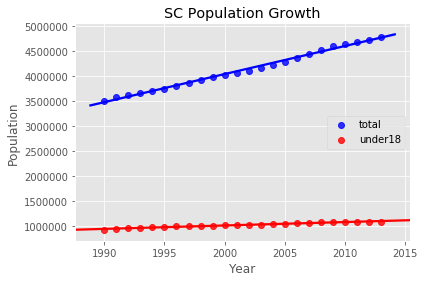

In [10]:
# import state population data
df = pd.read_csv('DSHB_Data\state-population.csv')

# filter the total population
sc_totes_filter = np.logical_and(df['state/region'] == 'SC', df['ages'] == 'total')
sc_pop_data = df[sc_totes_filter]
sc_sorted_pop_data = sc_pop_data.sort_values('year')
sc_sorted_pop_data.reset_index(inplace=True)
del sc_sorted_pop_data['index']

# filter the under18 population
sc_young_filter = np.logical_and(df['state/region'] == 'SC', df['ages'] == 'under18')
sc_pop_young = df[sc_young_filter]
sc_sorted_young_data = sc_pop_young.sort_values('year')
sc_sorted_young_data.reset_index(inplace=True)
del sc_sorted_young_data['index']


sns.regplot(x='year', y='population', label='total', color='blue', data=sc_sorted_pop_data)
sns.regplot(x='year', y='population', label='under18', color='red', data=sc_sorted_young_data)
plt.title('SC Population Growth')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='center right')
plt.show()

## Univariate Plots
#### Strip Plot and Swarm Plot
- Draw numbers on a single number line showing the distribution of points within that variable
    - shows density in certain areas, as well as making outliers more obvious
- `sns.stripplot([x='xcol_name',] y='col_name' , data=df[, hue='col_name'][, size=num, jitter=True])`
    - only looking at one var at a time
    - can add `plt.ylabel()` and `plt.title()` as needed
    - adding a categorical 'x' column will draw separate lines for each category
    - adding the `size` and `jitter` args will spread out the points enough to see groupings better
- `sns.swarmplot([x='xcol_name',] y='col_name' , data=df[, hue='col_name'])`
    - works similarly to 'stripplot' except no values overlap, and patterns can be clearer
    - `hue=` will split the points into diff colors, based on the values in that column
    - to rotate the graph
        - switch the x and y vars, and use `orient='h'` as an arg

#### Box Plots
- `sns.boxplot(x='xcol', y='ycol', data=df)`

#### Violin Plots
- Similar to boxplots, but provide a density distrubtion shape
    - `sns.violinplot(x='xcol', y='ycol', data=df)`

#### Overlaying Multiple Univariate Plots
- Example: a violin plot with a jitter stripplot over it
    - `sns.violinplot(x='xcol', y='ycol', data=df, inner=None, color='lightgray')`
        - `inner=None` will display the inner boxplot
        - `color='lightgray'` to keep in background
    - `sns.stripplot(x='xcol', y='ycol', data=df, size=4, jitter=True)`
        - create a stripplot with jitter
    - any axis labels, titles, only need to be added once at the end prior to showing the plot

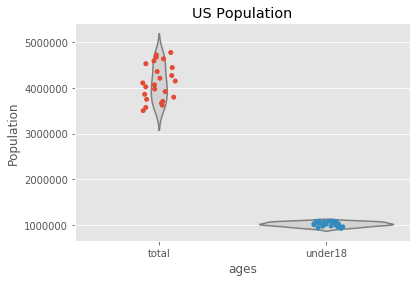

In [11]:
# using state population data

filter = df['state/region'] == 'SC'
sc_data = df[filter]
sc_sorted_data = sc_data.sort_values('year')
sc_sorted_data.reset_index(inplace=True)
del sc_sorted_data['index']

sns.violinplot(x='ages', y='population', data=sc_sorted_data, inner=None, color='lightgray')
sns.stripplot(x='ages', y='population', data=sc_sorted_data, size=5, jitter=True)
plt.title('US Population')
plt.ylabel('Population')
plt.show()

## Multi-Variate Plots
#### Joint Plots
- Plot bivariate data as a scatter plot
- p value and r value are displayed automatically
- individual histograms are displayed automatically on the top and right of the graph
- `sns.jointplot(x='xcol', y='ycol', data=df[, kind='kde')`
    - default is a scatter plot and traditional histogram for each variable
    - `kind='kde'` enables 'kernel density estimation'
        - smoothes a contour density plot instead of scatter, and smoothes the histograms
    - `kind='scatter'`
    - `kind='reg'` regression
    - `kind='resid'`
    - `kind='hex'`

### Pair Plots
- Plot every variable against every other variable
- `sns.pairplot(df[, hue='col'])`
    - can separate by any categorical column
- can add the `kind` arg as above

#### Heat Maps
- Produce a covariance matrix first, illustrating the correlation between each variable
    - as `covariance` for this example
- `sns.heatmap(covariance)`
- good to look at correlations for many variables all at once (like genes)

   PRCP  SNWD  SNOW  TMAX  TMIN  AWND  WDF2  WDF5  WSF2  WSF5  WT01  WT05  \
0     0     0     0    72    33    12   340   310    36    40 -9999 -9999   
1    41     0     0   106    61    32   190   200    94   116 -9999 -9999   
2    15     0     0    89    28    26    30    50    63    72     1 -9999   
3     0     0     0    78     6    27    40    40    45    58     1 -9999   
4     0     0     0    83    -5    37    10    10    67    76 -9999 -9999   

   WT02  WT03  
0 -9999 -9999  
1 -9999 -9999  
2 -9999 -9999  
3 -9999 -9999  
4 -9999 -9999  


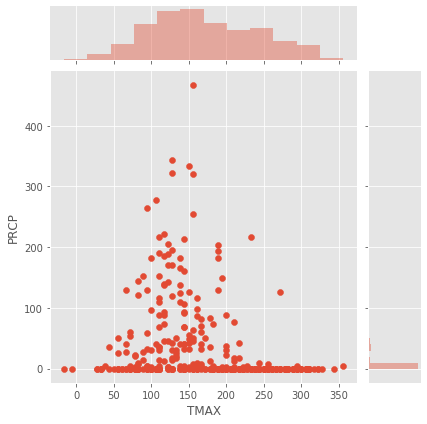

In [12]:
# using seattle2014 weather data
stl = pd.read_csv('DSHB_Data\Seattle2014.csv')

stl_df = stl.iloc[:,range(3,17)]
print(stl_df.head())

sns.jointplot(x='TMAX', y='PRCP', data=stl_df)
plt.show()

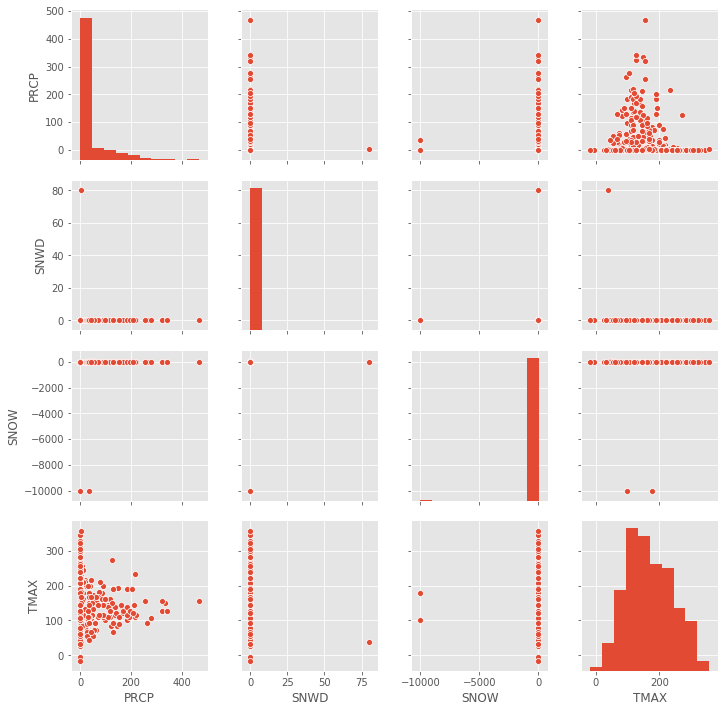

In [13]:
# using seattle2014 weather data
stl = pd.read_csv('DSHB_Data\Seattle2014.csv')

stl_df = stl.iloc[:,range(3,7)]

sns.pairplot(stl_df)
plt.show()

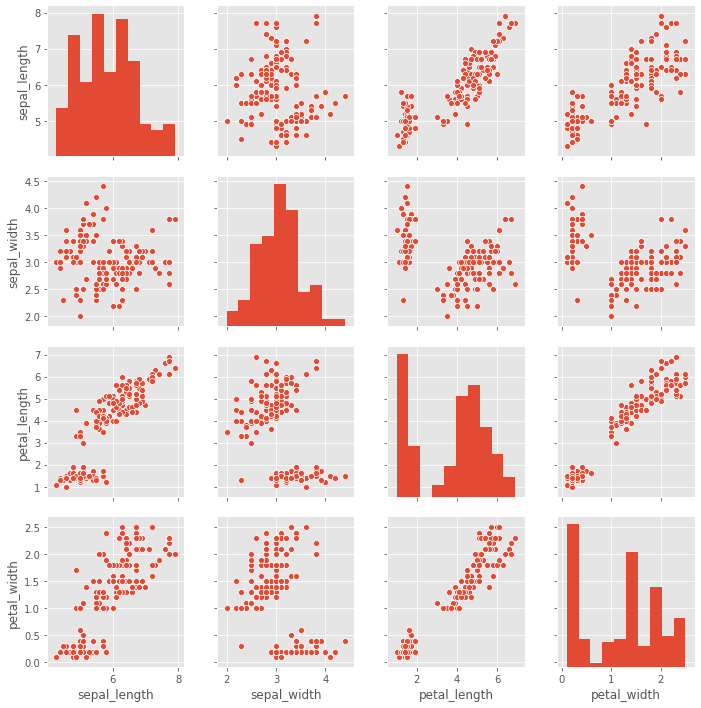

In [14]:
# same pair plot, with the iris dataset
iris = pd.read_csv('DSHB_Data\iris.csv')

sns.pairplot(iris)
plt.show()

## Interact and Widgets for Interactive Plots
- Need to import packages
    - `from IPython import display`
    - `from ipywidgets import interact, widgets`
    - some issue displaying widgets in Jupyter Lab, unable to find the fix
- See example below using gapminder data

In [2]:
# load the data
gapminder = pd.read_csv('gapminder.csv')

# build the plotting function
def plotyear(year):
    
    # use year to subset the data, taking year as a variable that can change
    data = gapminder[gapminder.year == year]
    
    # set the relative sizes for the population bubbles, colors for the regions
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

    # create the plot
    data.plot.scatter('babies_per_woman','age5_surviving',
                      s=area,c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(10,8))
    
    # configure plot properties
    plt.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    plt.xlabel('babies per woman')
    plt.ylabel('% children alive at 5')

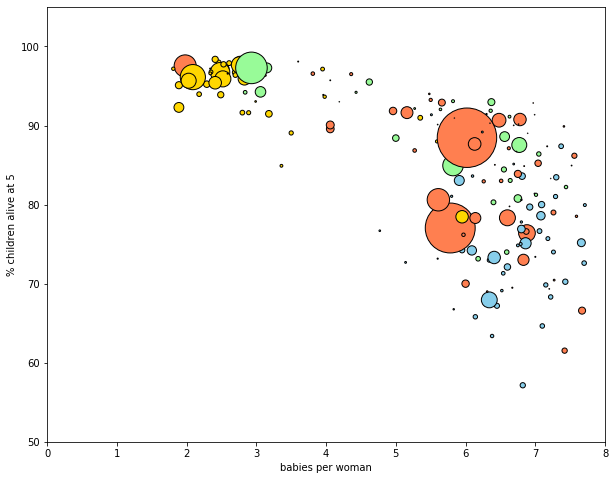

<function __main__.plotyear(year)>

In [3]:
# create the interactive plot
# use interact function: args are plotting function, then year specification as a slider widget
year_slider = widgets.IntSlider(min=1950,max=2015,step=1,value=1965)
interact(plotyear,year=year_slider)

## Bokeh

#### Documentation
[https://bokeh.pydata.org](https://bokeh.pydata.org)

#### Importing
- Need to import the relevant features
    - `from bokeh.io import output_file, show`
        - allows us to save the visualization in an html file, and open a browser to display that file
    - `from bokeh.io import output_notebook`
        - to display inline in a Jupyter Notebook
    - `from bokeh.plotting import figure`
        - creates basic empty plot
    - `from bokeh.models import ColumnDataSource`

## Basic Plotting
- `plot = figure(x_axis_label='', y_axis_label='', x_axis_datatype='', plot_width=, tools=)`
    - save the 'figure' in a variable
- Multiple Figures
    - when doing multiple figures, see 'Layout' section below
    - you can add multiple series/glyphs to the same plot using multiple glyph method calls
- Legends, Annotations, and Guides
    - see this section below
- Options
    - `x_axis_datatype=` & `y_axis_datatype`
        - specify datatype as a string (i.e. 'datetime')
    - `x_range=(min, max)`
        - tuple for min/max values
    - `y_range=(min, max)`
        - tuple for min/max values
    - `plot_width=`
        - set the width of the plot in pixels
    - `plot_height=`
        - set the height of the plot
    - `tools=`
        - supply a comma separated string of built-in tools or a list of tool objects
            - `'pan,box_zoom'` comma separated string of built-ins
            - looks like this limits options, and that there are standard ones if you don't specify
        - select tools
            - `box_select`
            - `lasso_select`
        - you can add tools after initializing your figure object
            - `plot.add_tools()` specifying which tools in ()
- See ColorMap section below for plotting different points different colors

#### Configuring a Figure
- Figure object assigned to variable 'plot' for these examples
    - examples are `plot.`
    - x & y data can come from a variety of sources including lists, numpy arrays, pandas series
- Scatter Plot Markers
    - `plot.circle(x=x_list, y=y_list, size=, color=, fill_color=, alpha=)`
        - x and y
            - the lists contain x and y coords of circles to draw 
                - (index 0 from each list specifies x, y for circle1)
            - can provide single values instead of lists for x, y, and all points inherit that value
        - size (optional)
            - can provide a single value or a list of values for different sizes of 'points'
        - color (optional)
            - specify the color
        - alpha (optional)
            - specify transparency as a decimal
    - other markers besides circles (glyphs)
        - `.asterisk()`
        - `.circle_cross()`
        - `.circle_x()`
        - `.cross()`
        - `.diamond()`
        - `.diamond_cross()`
        - `.inverted_triangle()`
        - `.square()`
        - `.square_cross()`
        - `.square_x()`
        - `.triangle()`
        - `.x()`
    - can add multiple markers to a plot by calling the methods for each marker on your figure object
- Line Plots
    - `plot.line(x=, y=, line_width=)`
        - x and y work like above, you can pass a single value or a list of values
    - `plot.circle(x=, y=)` will add markers to the line plot if the x, y data are the same
        - changing the `.circle` `fill_color=` can help with presentation
- Patches
    - can draw complex shapes like geographical areas
        - x data is a list of lists
            - sublists are different shapes
            - data within are the x coords for that shape
        - y data is a list of lists
            - sublists are different shapes
            - data within are the y coords for that shape
        - great for maps
            - x list holds longitude values for each shape
            - y list holds latitude values for each shape
        - Example:
            ```python
            from bokeh.io import output_file, show
            from bokeh.plotting import figure
            
            xs = [[1, 1, 2], [2, 2, 4, 4], [5, 5, 6]]
            ys = [[6, 7, 8], [2, 3, 6, 7], [4, 5, 6]]
            
            plot = figure()
            plot.patches(xs, ys, 
                         fill_color=['red', 'blue', 'green'],
                         line_color='white')
            output_file('patches.html')
            show(plot)
            ```
- Additional Glyphs
    - annulus, annular_wedge, wedge, patch, patches, rect, quad, vbar, hbar, image, image_rgba, 
    - image_url, line, multi_line, circle, oval, ellipse, arc, quadratic, bezier
- Combining Plot Types
    - all glyphs will be drawn in the order they are called
        - call multiple glyph methods to layer plots
    - can add markers to a line plot
        - just call that method after `.line` to overlay markers on the line
- Functions
    - `output_file('filename.html')`
        - saves the current plot as an html file
    - `show(plot)`
        - displays the current plot (if you named it plot) in a separate window

In [17]:
# create a basic scatter plot with simple data

# run output_notebook() to display inline with Jupyter Notebook
output_notebook()

# configure the plot area
plot = figure(title='Some Circle Points', x_axis_label='X Title (px)', 
              y_axis_label='Y Title (px)', plot_width=400, plot_height=300) #, tools='pan,box_zoom')

# add circle shaped points to the plot at specified x and y coords
plot.circle([1,2,3,4,5], [8,6,5,2,3])

# show the plot
show(plot)

Loading BokehJS ...

## Using ColumnDataSource
- Create an instance of ColumnDataSource
```python
source = ColumnDataSource(data={
                               'x': [1, 2, 3, 4]
                               'y': [9, 8, 7, 6]})
```
- pass a dictionary to the data parameter with strings as the keys and sequences (arrays/lists) as values
    - all columns must be the same length
    - accepts more than two columns, this is just an example
- **can also pass a dataframe directly to the constructor** (with more than two columns)
```python
source = ColumnDataSource(df)
```
- Using a ColumnDataSource
    - `plot.circle(x='x_col_name', y='y_col_name', color='color_col_name', source=source)`
        - assumes the ColumnDataSource variable is `source`
        - may get weird errors if you specify `x=` and `y=`
            - can just pass the column name in '' with no x/y assignment variables

#### Advanced Glyph Customization
- Setting these options
    - set all of these parameters in the glyph call (i.e. `plot.circle(set here)`)
- Selection Options
    - you can select points, and change their appearance when selected vs. not selected
        - property name prefixed with 'selection_' or 'nonselection_'
    - `selection_color=`
        - specifies **fill_color** and **line_color** at the same time
    - `selection_alpha=`
    - `nonselection_fill_alpha=`
    - `nonselection_fill_color=`

#### HoverTool
- `from bokeh.models import HoverTool`
- Initialize a HoverTool object
    - `hover = HoverTools(tooltips=, mode=)`
        - `tooltips=`
            - `None`
        - `mode=`
            - `hline`
            - `vline`
- Add the `hover` object as a `tool` to your `figure` call when create a `plot`
    - `plot = figure(tools=[hover, 'crosshair'])`
        - this example adds a crosshair, which draws x, y lines crossing on your hover point
- Add 'hover policy' to your glyph call
    - `plot.circle(x, y, size=, hover_color='red')`
        - hover policy is similar to selection options
            - property name prefixed with 'hover_'
- Additional info below in 'Annotations and Guides'

#### ColorMap
- `from bokeh.models import CategoricalColorMapper`
- Initialize a ColorMapper object
```python
mapper = CategoricalColorMapper(
          factors=['category1', 'category2', 'category3'],
          palette=['green', 'blue', 'red'])
```
- Attributes
    - Need to specify `factors` which are the categories to color (from a column in your data)
    - Need to specify `palette` to list the colors for your categories
        - there are built-in palettes you can use, see documentation
- Using a ColorMap
    - no changes to your figure call
    - add the following to your glyph call
        - `plot.circle(color={'field': 'col_name', 'transform': mapper})`
        - pass a dictionary to the `color` option
            - `'field'=` your column name to search for your factors
            - `'transform'=` your mapper object

## Layout

#### Simple Rows & Columns
- Import needed elements
    - `from bokeh.layouts import row`
    - `from bokeh.layouts import column`
- Row of plots (multiple plots in the same row)
    - `layout = row(plot1, plot2, plot3)` put as many plots as needed and save in 'layout' variable
        - use imported 'row' function
        - define your plots first
        - use either `output_notebook()` or `output_file(filename)` prior to showing
            - this is standard for bokeh plotting
    - `show(layout)`
- Column of plots (multiple plots in the same column)
    - `layout = column(plot1, plot2, plot3)` put as many plots as needed and save in 'layout' variable
    - `show(layout)`
- Rows and Columns
    - pass a 'column' to a row arg or vice versa
        - `layout = row(column(p1, p2), column(p3, p4))`
            - each row entry does NOT have to have the same number of column entries
    - **if adding extra args to layout, your 'plots' must be in a list `[]`**
        - `layout = row([p1, p2], sizing_mode='scale_width')`
    - **Extra Args**
        - `sizing_mode=`
            - 'scale_width'

#### Grids
- Import gridplot
    - `from bokeh.layouts import gridplot`
- Set layout
    - `layout = gridplot([[p1, p2], [p3, p4]], *options)`
        - provide a list of lists for the plots
        - each sublist is a row, p1 & p2 on top row left to right, p3 & p4 on bottom row
        - sublists should be the same length
            - use `None` if you want a blank gridspace
- Toolbar
    - all toolbars are combined into one toolbar
- `gridplot` options
    - `toolbar_location=`
        - `None` for no toolbar
        - `above`, `below`, `left`, `right`
        
#### Tabbed Layouts
- Import Tabs and Panel
    - `from bokeh.models.widgets import Tabs, Panel`
- Create a 'panel' for each tab
    - `tab = Panel(child=, title=)`
        - `tab` is the variable that stores the panel
        - `child` has the contents of the tab
            - can be a single plot object or a layout (calls to row(), column(), or gridplot())
            - ex. `child=p1` or `child=gridplot([[p1, p2], [p3, None]], toolbar_location='right')`
        - `title` is the display name for the tab as a string
- Collect 'panels' into a 'tabs object'
    - `tabs = Tabs(tabs=[tab1, tab2...])`
        - supply the names of your panel variables as a list
- output and show the plot
    - use `output_notebook()` or `output_file('filename.html')` and `show(tabs)`

In [16]:
# create a tabbed layout using all these tools

# build plot1
p1 = figure(x_axis_label='Numbers (1-5)', y_axis_label='Numbers (2-10)')
p1.circle(x=[1, 2, 3, 4, 5], y=[2, 4, 6, 8, 10], size=10, color='blue', alpha=0.8)

# build plot2
p2 = figure(x_axis_label='Numbers (1-5)', y_axis_label='Numbers (2-10)')
p2.x(x=[1, 2, 3, 4, 5], y=[2, 4, 6, 8, 10], size=10, color='red', alpha=0.8)

# build plot3
p3 = figure(x_axis_label='Numbers (1-5)', y_axis_label='Numbers (2-10)')
p3.asterisk(x=[1, 2, 3, 4, 5], y=[2, 4, 6, 8, 10], size=10, color='green', alpha=0.8)

# build plot4
p4 = figure(x_axis_label='Numbers (1-5)', y_axis_label='Numbers (2-10)')
p4.line(x=[1, 2, 3, 4, 5], y=[2, 4, 6, 8, 10], line_width=8, color='purple')
p4.diamond(x=[1, 2, 3, 4, 5], y=[2, 4, 6, 8, 10], size=20, line_color='purple', fill_color='white')

# build tabs
tab1 = Panel(child=p1, title='Plot 1')
tab2 = Panel(child=p2, title='Plot 2')
tab3 = Panel(child=row([p3, p4], sizing_mode='scale_width'), title='Plot 3')

# assign to a tabs object
tabs = Tabs(tabs=[tab1, tab2, tab3])

# output in the notebook
output_notebook()

# show the plots
show(tabs)

Loading BokehJS ...

## Linking Plots Together
- See documentation link above for more details on this

- Linked Panning (scrolling along an axis)
    - link your axes
        - `p3.x_range = p2.x_range = p1.x_range`
            - link all plots as necessary (where `p1` etc. are figure objects)
        - `p3.y_range = p2.y_range = p1.y_range`
        
- Linked Brushing (Selections)
    - highlight an area on one plot, and corresponding data are highlated on a linked plot
        - the 'corresponding' points are the ones at the same index on a different plot
            - these won't necessarily have the same x, y coords (ranges)
            - i.e. you're not highlighting an x, y range and highlighting those points
            - you're highlighting points from instances/rows/observations
    - plots must be the same shape
        - have them share the same ColumnDataSource and use `source=source` as defined above

## Annotations and Guides (Including Legends)
- Legends
    - legend location
        - `plot.legend.location=`
            - `'top_left'`
            - `'bottom_left'`
            - `'top_right'`
            - `'bottom_right'`
    - when using a ColorMapper & ColumnDataSource
        - in your glyph call, include `legend='col_name'` when mapping based on values in a column
    - legend styles
        - `plot.legend.background_fill_color=`

- Hover Tool Tips
    - import
        - `from bokeh.models import HoverTool`
    - create HoverTool object
        - `hover = HoverTool(tooltips=[])`
            - pass a list of tuples
                - first element is a string that will label a row in the tooltip that is displayed
                - second element is a format string that will show the associated value for that row
                    - using a string that begins with `@` will reference columns in the ColumnDataSource
                    - the string will be replaced with the actual values from the data
                    - the dollar sign symbol also does stuff like @ does
    - Example using iris dataset
        ```python
        hover = HoverTool(tooltips=[
                ('Species Name', '@species'),
                ('Petal Length', '@petal_length'),
                ('Sepal Length', '@sepal_length')
                ])
        
        plot = figure(tools=[hover, 'pan', 'wheel_zoom'])
        ```

## Bokeh Server

#### Basic info
- Connects visualizations to python functions and libraries
    - allows much more interactive visualizations that can do computations etc.
- Basic App Outline
    - `from bokeh.io import curdoc`
        - 'current document' that holds all of the events and controls
    - create plots and widgets
    - create and add callbacks
        - functions that run in response to an event
    - arrange plots and widgets into layouts
        - see above for layouts
    - `curdoc().add_root(layout)` using your created 'layout' variable
    - usually best to use a ColumnDataSource when you want to be able to update figures
- Running the App
    - from the cmd line
        - single file app
            - `bokeh serve --show myapp.py`
                - filename for app saved as 'myapp.py'
                - `--show` causes the app to open in a browser window, it is running
        - multi-file app (directory style)
            - can include data files, themes, or html templates
            - `bokeh serve --show myappdir/`
                - need to look up more info on structure of these apps and how they work

#### Add Sliders
- Import elements
    - `from bokeh.io import curdoc`
    - `from bokeh.layouts import widgetbox`
    - `from bokeh.models import Slider`
- Create a slider object
    - `slider = Slider(title='my slider', start=0, end=10, step=0.1, value=2)`
        - `value` is the starting value
- Create a widgetbox layout: layout
    - `layout = widgetbox(slider)`
        - can add multiple sliders (or other widgets), just separate objects with commas
- Add the layout to the current document
    - `curdoc().add_root(layout)`

- Adding sliders to plots
    - usually best to specify a ColumnDataSource when you want to be able to update data

#### Adding Callbacks

- Function always has the same format
    - example below adds a slider to a plot
    
```python
def callback(attr, old, new):
    # attr is attribute that changes, with old and new values
    # callback funcs always have these same three args
    
    # read in intial value for slider object (was set N=300 for example when building the slider)
    # as you move the slider, it changes the value of N
    N = slider.value
    
    # set data source (using random numbers, this was the same data used in ColumnDataSource to creat the plot 
    # as the value of N changes (move slider), the data dictionary for our ColumnDataSource changes
    source.data = {'x': np.random(N), 'y': np.random(N)}
```

- **Updating titles/labels of plot areas**
    - using your callback function
    - 'N' above will change based on the slider position
    - use attributes and placeholders to update the value in the title
        - `plot.title.text = 'N is set to %d' % N`
            - use `%d` to placehold a digit
            - use `%s` to placehold a string
            - use `% var` to specify the variable that will change and update your title/label
- Attach callback to an object (such as a slider)
    - `slider.on_change('value', callback)`
        - use `.on_change()` method
        - `'value'` is the name of the property we'd like to watch
            - updates plot whenever the 'value' changes
        - use your callback function defined earlier
- Use layout functions to design the view
    - `layout = row(), column(), or gridplot()`
    - include your object where you want it to display
        - `layout = column(slider, plot)` will put the slider above the plot
- Add to the current doc
    - `curdoc().add_root(layout)`

#### Updating plots from dropdowns
- Need to import select
    - `from bokeh.models import Select`
- Configure plot like normal
- Create a Select oject
    - `menu = Select(options=[list_of_menu_options], value='intial_value_from_list', title='')`
        - `options` is a list of strings to display in the dropdown
- Define Callback and assign
    - this example is using np functions random, normal, and lognormal to alter the data

```python
# same plot setup as previous example
N = 1000
source.data = {'x': np.random(N), 'y': np.random(N)}
plot = figure()
plot.circle('x', 'y', source=source)

# configure menu
menu = Select(options=['random', 'normal', 'lognormal'], value='random', title='Distribution')

def callback(attr, old, new):
    if menu.value == 'random': f = random
    elif menu.value == 'normal': f = normal
    else:                      f = lognormal
    source.data={'x': f(size=N), 'y': f(size=N)}
menu.on_change('value', callback)
layout = row(plot, menu)
curdoc().add_root(layout)
```

#### Buttons
- Can perform actions including calculations and file downloads
    - `from bokeh.models import Button`
- Create the button
    - `button = Button(label='Click Here')`
- Create the callback (**button callbacks do not take any args**)
    - `def update(): # do something interesting`
    - can pretty much be any python command
- Assign the callback using `on_click()`
    - `button.on_click(update)`
- Other button types (must import these classes from `bokeh.models`)
    - toggle
        - `toggle = Toggle(label='On/Off', button_type='success')`
    - checkbox
        - `checkbox = CheckboxGroup(labels=['foo', 'bar', 'baz'])`
    - radio
        - `radio = RadioGroup(labels=[1, 2, 3])`
    - callbacks
        - `def callback(active):` active tells which button is active

## Hosting Bokeh Applications
- 'Running a bokeh server' section of @ [www.bokeh.pydata.org](www.bokeh.pydata.org)
- Can also be published on the Anaconda Cloud at [https://anaconda.org](anaconda.org)
    - see these urls for more info